In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
digits = load_digits()
X, y = digits.data, digits.target


<Figure size 640x480 with 0 Axes>

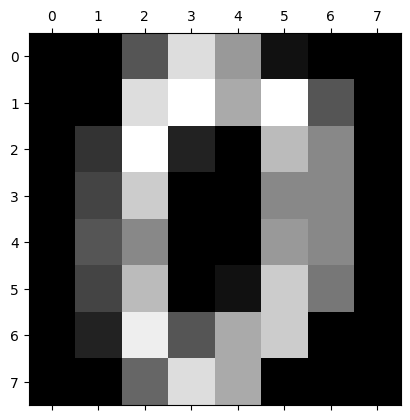

In [34]:
plt.gray()
plt.matshow(digits.images[0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
rf_model = RandomForestClassifier()


In [18]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [19]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)


In [20]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [21]:
best_params = grid_search.best_params_


In [22]:
best_model = grid_search.best_estimator_


In [23]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [24]:
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy: {accuracy}")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Test Set Accuracy: 0.9722222222222222


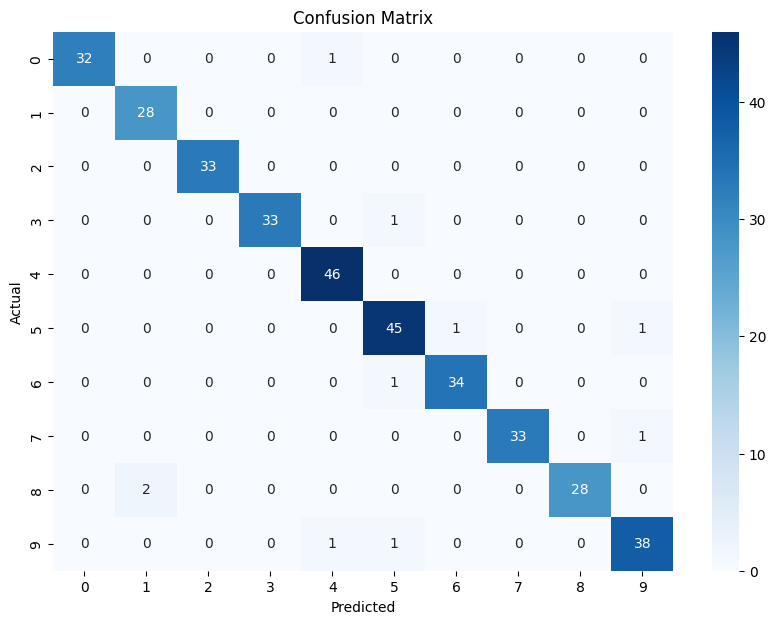

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
